# Introductory applied machine learning (INFR10069)

# Assignment 3: Object recognition

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook and a `.txt` file (see Part 2) in answer to this assignment.
**You need to submit these two files electronically as described below.**

Place your notebook and `.txt` files **only** in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 3 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn 0.17
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions), unless stated otherwise.

## Imports

In this assignment you are asked to import all the packages and modules you will need. Include all required imports and execute the cell below.

In [7]:
from __future__ import print_function, division
%matplotlib inline

# Your code goes here
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC

ImportError: No module named seaborn

## Description of the dataset
In this assignment our goal is to recognize objects from 19 dierent visual classes (e.g. person, dog, cat, car, ...) in realistic scenes. The dataset consists of several thousands photographs harvested from the web. Each object of a relevant class has been manually annotated with a bounding box. Images can contain none, one or multiple objects of each class. We have prepared a [website](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) where you can view the images.

Here we will focus on a single classiffication task: you will be required to classify images as to whether or not they contain a person. To save you time and to make the problem manageable with limited computational resources, we have preprocessed the dataset. We will use the [Bag of Visual Words](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision) representation. That is, each image is represented by a 500 dimensional vector that contains the normalized count for each of 500 diffeerent visual words present in the respective image (a similar representation is used for the spambase dataset, just for real words). Visual words are based on [Scale-invariant feature transforms (SIFT)](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform). SIFT features are essentially local orientation histograms and capture the properties of small image regions. They possess attractive invariance properties which make them well suited for our task (you can read more about SIFT features in [D.Lowe, IJCV 60(2):91- 110, 2004](http://link.springer.com/article/10.1023/B:VISI.0000029664.99615.94), but the details don't matter for the purpose of this assignment). Each SIFT feature is a 128 dimensional vector. From each image many SIFT features are extracted, typically > 2500 per image (features are extracted at regular intervals using a 15 pixel grid and at 4 different scales). To obtain visual words a representative subset of all extracted SIFT features from all images is chosen and clustered with k-means using 500 centres (such use of the k-means algorithm will be discussed in detail during the lecture). These 500 cluster centres form our visual words. The representation of a single image is obtained by first assigning each SIFT feature extracted from the image to the appropriate cluster (i.e. we determine the visual word corresponding to each feature by picking the closest cluster centre). We then count the number of features from that image assigned to each cluster (i.e. we determine how often each visual word is present in the image). This results in a 500 dimensional count vector for each image (one dimension for each visual word). The normalized version of this count vector gives the final representation of the image (normalized means that we divide the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image). Our dataset with all images is thus a $N \times 500$ dimensional matrix where `N` is the number of images. The resulting representation is much more compact and can be used directly to perform classiffication.

The full dataset has 520 attributes (dimensions). The first attribute (`imgID`) contains the image ID which allows you to associate a data point with an actual image. The next 500 attributes (`dim1`, ..., `dim500`) correspond to the normalized count vector. The last 19 attributes (`is_class`) indicate the presence of at least one object of a particular class in the image. In most of the experiments (unless explicitly noted otherwise) you will be asked to train classiffiers for classifying person vs. non-person images and only the `is_person` attribute and the 500 dimensional feature vector will be used. Do not use the additional class indicator attributes as features unless explicitly told to do so. 

In Part A we provide you with a training (`train_images partA.csv`) and a validation (`valid_images partA .csv`) dataset. In Part B we provide three data sets: a training set (`train_images partB.csv`), a validation set (`valid_images partB.csv`), and a test set (`test_images partB.csv`). The training and validation set contain valid labels. In the test set the labels are missing. The files are available from the GitHub repository. 

*Important: Throughout the assignment you will be given various versions of the dataset that are relevant
to a particular question. Please be careful to use the correct version of the dataset when instructed to do so.
If you use the wrong version of the dataset by mistake no marks will be awarded.*

## 1. Exploration of the dataset [70%]

### ========== Question 1.1 ==========
Load the datasets `train_images_partA.csv` and `valid_images_partA.csv` into two pandas DataFrame called `train_A` and `valid_A`. Display the number of data points and attributes in each of the two datasets.

In [2]:
# Your code goes here
data_path = os.path.join(os.getcwd(), 'datasets', 'train_images_partA.csv')
train_A = pd.read_csv(data_path, delimiter = ',')
data_path_2 = os.path.join(os.getcwd(), 'datasets', 'valid_images_partA.csv')
valid_A = pd.read_csv(data_path, delimiter = ',')

print('Number of instances of train_A: {}, number of attributes: {}'.format(train_A.shape[0], train_A.shape[1]))
print('Number of instances of valid_A: {}, number of attributes: {}'.format(valid_A.shape[0], valid_A.shape[1]))


Number of instances of train_A: 2093, number of attributes: 520
Number of instances of valid_A: 2093, number of attributes: 520


### ========== Question 1.2 ==========
Display and inspect the first 10 instances in the training dataset.

In [3]:
# Your code goes here
train_A.head(10)
train_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Columns: 520 entries, imgId to is_tvmonitor
dtypes: float64(495), int64(24), object(1)
memory usage: 8.3+ MB


### ========== Question 1.3 ==========
In this part we want to select the appopriate attributes (i.e. input features) for training our classifiers. These should be the attributes `dim1, dim2, ..., dim500`. Create a list which has as elements the **names** of the attributes of interest. 

In [4]:
# Your code goes here
names = list(train_A.columns[1:501])
print(names)

['dim1', 'dim2', 'dim3', 'dim4', 'dim5', 'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13', 'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20', 'dim21', 'dim22', 'dim23', 'dim24', 'dim25', 'dim26', 'dim27', 'dim28', 'dim29', 'dim30', 'dim31', 'dim32', 'dim33', 'dim34', 'dim35', 'dim36', 'dim37', 'dim38', 'dim39', 'dim40', 'dim41', 'dim42', 'dim43', 'dim44', 'dim45', 'dim46', 'dim47', 'dim48', 'dim49', 'dim50', 'dim51', 'dim52', 'dim53', 'dim54', 'dim55', 'dim56', 'dim57', 'dim58', 'dim59', 'dim60', 'dim61', 'dim62', 'dim63', 'dim64', 'dim65', 'dim66', 'dim67', 'dim68', 'dim69', 'dim70', 'dim71', 'dim72', 'dim73', 'dim74', 'dim75', 'dim76', 'dim77', 'dim78', 'dim79', 'dim80', 'dim81', 'dim82', 'dim83', 'dim84', 'dim85', 'dim86', 'dim87', 'dim88', 'dim89', 'dim90', 'dim91', 'dim92', 'dim93', 'dim94', 'dim95', 'dim96', 'dim97', 'dim98', 'dim99', 'dim100', 'dim101', 'dim102', 'dim103', 'dim104', 'dim105', 'dim106', 'dim107', 'dim108', 'dim109', 'dim110', 'dim111

### ========== Question 1.4 --- [1 mark] ==========
By using the list from Question 1.3 now create 4 numpy arrays `X_tr`, `X_val`, `y_tr` and `y_val` and store the training features, validation features, training targets, and validation targets, respectively. Your target vectors should correspond to the `is_person` attribute of the training and validation sets (also make sure you do not include this attribute in your training features). Display the dimensionalities (i.e shapes) of the 4 arrays and make sure your input data are 500-dimensional.

In [5]:
# Your code goes here
X_tr, X_val, y_tr, y_val = train_A[names], valid_A[names], train_A["is_person"], valid_A["is_person"]
print(X_tr.shape)
print(X_val.shape)
print(y_tr.shape)
print(y_val.shape)

(2093, 500)
(2093, 500)
(2093,)
(2093,)


### ========== Question 1.5 ==========
Show two [countplots](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) of the targets in a single plot, one for the training and one for the validation set. Label axes appropriately and add a title to your plot. Use descriptive `xticklabels` instead of the default numeric ones.

In [6]:
# Your code goes here
ax = sns.countplot(x = y_tr)
ax_2 = sns.countplot(x = y_val)
ax_2.set_xticklabels(["No person", "person"])
ax_2.set_title("Target Data")

NameError: name 'sns' is not defined

### ========== Question 1.6 ==========
What would be a good choice for a baseline classifier to compare your results in the next steps against? What classification accuracy score does the baseline classifier achieve in the validation set?

A good choice for the baseline classifier is a Dummy Classifier. The classification accuracy is very low for the validation set because it is a classifier that is used to compare results better classifiers. 



In [137]:
# Your code goes here
from sklearn.dummy import DummyClassifier
dc = DummyClassifier()
dc.fit(X_tr, y_tr)
dc.score(X_val, y_val)

0.51218346870520781

### ========== Question 1.7 ==========
Train a [`LogisticRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier by using default settings, except for the `solver` parameter which you should set to `lbfgs`. Report the classification accuracy score in the training and validation sets and compare to that of the baseline classifier. Comment in 1-2 sentences the results. You may include any additional plot(s) if you wish to justify your explanation.

In [8]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
lr.fit(X_val, y_val)
print('Classification accuracy on training set: {:.3f}'.format(lr.score(X_tr, y_tr)))
print('Classification accuracy on validation set: {:.3f}'.format(lr.score(X_val, y_val)))

Classification accuracy on training set: 0.551
Classification accuracy on validation set: 0.551


The Logistic Regression classifier has a better accuracy than the baseline, which is as expected. However, the accuracy still is not great.

 

### ========== Question 1.8 ==========
Display the means and standard deviations of the first 5 features in the training set. *Hint: you want to compute the means and standard deviations across the columns of your arrays. Make sure you make appropriate use of the `axis` parameter.*

In [9]:
# Your code goes here

np.set_printoptions(precision=3)
print("Training set mean:")
print(train_A[0:5].mean(axis=1))
print("Training set standard deviation")
print(valid_A[0:5].std(axis=1))

Training set mean:
0    0.005780
1    0.003854
2    0.003854
3    0.007707
4    0.003854
dtype: float64
Training set standard deviation
0    0.061921
1    0.043843
2    0.043870
3    0.075756
4    0.043863
dtype: float64


### ========== Question 1.9 ==========
Feature standardisation is a pre-processing technique used to transform data so that they have zero mean and unit standard deviation. For many algorithms, this is a very important step for training models (both regression and classification). Read about [feature standardisation](http://scikit-learn.org/0.17/modules/preprocessing.html) and make sure you understand what kind of transformation this method applies to the data.

`Scikit-learn` offers an [implementation](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.StandardScaler.html) of feature standardisation. Create a standardiser and fit it by using training features only. Then transform both your input and validation input features. 

Once your training and validation input data have been transformed, display the means and standard deviations of the first 5 attributes for **both** the training and validation sets. Are the results as you expected? Explain your answer in 2-3 sentences. 

**IMPORTANT: You should use the transformed data for the rest of part A**.

In [10]:

scaler = preprocessing.StandardScaler().fit(X_tr)
X_tr_trans = (scaler.transform(X_tr))
X_val_trans = (scaler.transform(X_val))
print("Training set mean:")
print(X_tr_trans[0:5].mean(axis=1))
print("Training set standard deviation")
print(X_tr_trans[0:5].std(axis=1))

print("Validation set mean:")
print(X_val_trans[0:5].mean(axis=1))
print("Validation set standard deviation")
print(X_val_trans[0:5].std(axis=1))

Training set mean:
[ 0.043  0.095  0.044  0.043 -0.014]
Training set standard deviation
[ 0.781  0.909  1.035  0.901  0.858]
Validation set mean:
[ 0.043  0.095  0.044  0.043 -0.014]
Validation set standard deviation
[ 0.781  0.909  1.035  0.901  0.858]


I expected the training set to have a very low value close to 0, so more negative exponents. I think the standard deviation was pretty close. It is supposed to be very close to 1. 


### ========== Question 1.10 ==========
By using the transformed input data, retrain a `LogisticRegression` classifier. Again, set the `solver` parameter to `lbfgs` and use default settings for the other parameters. Report the classification accuracy in both the training and validation sets. How does your model compare to the baseline classifier from Question 1.6? You may use additional plot(s) to support your explanation.

In [11]:
# Your code goes here
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr_trans, y_tr)
lr.fit(X_val_trans, y_val)
print('Classification accuracy on training set: {:.3f}'.format(lr.score(X_tr_trans, y_tr)))
print('Classification accuracy on validation set: {:.3f}'.format(lr.score(X_val_trans, y_val)))

Classification accuracy on training set: 0.811
Classification accuracy on validation set: 0.811


This classification accuracy is much better than the baseline classifier. 



### ========== Question 1.11 ==========
So far we have used default settings for training the logistic regression classifier. Now, we want to use [K-fold cross-validation](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.KFold.html) to optimise the regularisation parameter `C`. The regularisation parameter controls the degree to which we wish to penalise large magnitudes for the weight vector. Thus, it helps us prevent overfitting and, for logistic regression, it additionally controls the level of confidence in making predictions.

We would like to optimise this parameter **by using the transformed training dataset only** and not the validation set. Create a 3-fold cross-validation object for the training dataset. Set the `shuffle` parameter to `True` and the `random_state` to `0`. By using the cross-validation iterator, display the number of test samples in each iteration fold.

In [12]:
# Your code goes here
kf = KFold(500, n_folds=3, shuffle=True, random_state=0)
for train, test in kf:
    print("TRAIN:", train, "TEST:", test)
    X_train, X_test = X_tr_trans[train], X_tr_trans[test]
    y_train, y_test = y_tr[train], y_tr[test]
    print("NUMBER OF TEST SAMPLES PER ITERATION FOLD:", len(test))

TRAIN: [  0   2   3   9  11  13  16  17  18  19  23  24  25  27  28  29  30  31
  32  33  34  35  36  38  39  40  41  42  43  44  47  48  50  51  53  57
  58  61  62  63  66  67  69  70  72  73  77  79  80  82  83  84  85  86
  87  88  89  91  92  93  94  95  97  98  99 101 103 104 105 106 109 110
 111 112 114 115 116 117 119 120 121 123 125 126 127 128 129 130 131 133
 136 138 139 140 143 145 146 147 148 149 150 151 152 156 158 160 161 162
 163 164 165 166 167 168 169 172 174 176 177 178 180 181 182 183 184 185
 187 189 190 192 193 195 197 198 199 201 202 203 204 206 207 209 211 212
 214 215 216 217 218 222 223 226 227 228 230 232 234 237 242 243 244 246
 247 248 249 251 252 253 255 256 257 258 259 260 261 262 263 265 266 267
 268 269 270 273 274 275 277 279 280 281 282 285 286 287 288 290 291 292
 294 296 298 302 303 304 305 306 307 308 309 310 312 313 314 315 317 319
 320 321 323 324 328 332 333 334 335 337 338 339 341 344 345 346 347 349
 350 351 352 354 356 357 358 359 360 361 364

### ========== Question 1.12 ========== 
Now we want to test out different settings for the regularisation parameter `C` by using the cross-validation iterator from the previous question. For each iteration, we want to train multiple classifiers by using a range of values for `C` and then compute the performance within each CV fold. You should use a log-range for `C` from `1e-5` to `1e5` by using 20 equally-spaced values *(hint: look at the `logspace()` function in numpy)*. 

Create a 2-dimensional array and, for each cross-validation fold and parameter setting pair, compute and store the classification accuracy score e.g. store the score of fold 0 with parameter setting 1 at score_array[0,1]. As previously, set the `solver` parameter to `lbfgs` and use default settings for the other parameters.

*(hint: your may want to use two loops in your code; one iterating over CV folds and another one iterating over the values for `C`)*. 

In [13]:
C = np.logspace(start=-5, stop=5, num=20)
kf = KFold(500, n_folds=3, shuffle=True, random_state=0)
score_array = np.empty((3, 20))

for train, test in kf:
    X_train, X_test = X_tr_trans[train], X_tr_trans[test]
    y_train, y_test = y_tr[train], y_tr[test]
    fold = 0
    for c in C:
        count = 1
        lr = LogisticRegression(solver='lbfgs', C = c)
        lr.fit(X_train, y_train)
        score_array[fold, count] = lr.score(X_train, y_train)
        count = count + 1
        
    fold = fold + 1
        
print(score_array)
    
    
        
    

[[  0.000e+000   1.000e+000   2.372e-322   1.749e-060   2.202e-314
    2.134e-314   0.000e+000   0.000e+000   0.000e+000   0.000e+000
    0.000e+000   0.000e+000   0.000e+000   0.000e+000   0.000e+000
    1.992e-060   2.202e-314   2.134e-314   1.750e-060   2.202e-314]
 [  2.134e-314  -9.245e+255   2.202e-314   2.134e-314   0.000e+000
    0.000e+000   0.000e+000   0.000e+000   0.000e+000   0.000e+000
    0.000e+000   0.000e+000   0.000e+000   0.000e+000   0.000e+000
    0.000e+000   0.000e+000   0.000e+000   0.000e+000   0.000e+000]
 [  0.000e+000   0.000e+000   0.000e+000   0.000e+000   0.000e+000
    0.000e+000   0.000e+000   0.000e+000   0.000e+000   0.000e+000
    0.000e+000   0.000e+000   0.000e+000   0.000e+000   0.000e+000
    0.000e+000   0.000e+000   0.000e+000   0.000e+000   0.000e+000]]


### ========== Question 1.13 ========== 
Plot the mean classification performance (across CV folds) of the logistic regression classifier against the regularisation parameter `C` by using the range from Question 1.12. Use a logarithmic scale for the x-axis and label both axes appropriately. 

[7.1147968388155609e-315, -3.0816364459830212e+255, 7.3400163225669975e-315, 5.8287667619416298e-61, 7.3399789712041719e-315, 7.1147967202398059e-315, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.6393807576169669e-61, 7.3400181407285742e-315, 7.1147969178660643e-315, 5.8317217432795581e-61, 7.339980156961722e-315]
6.63938075762e-61


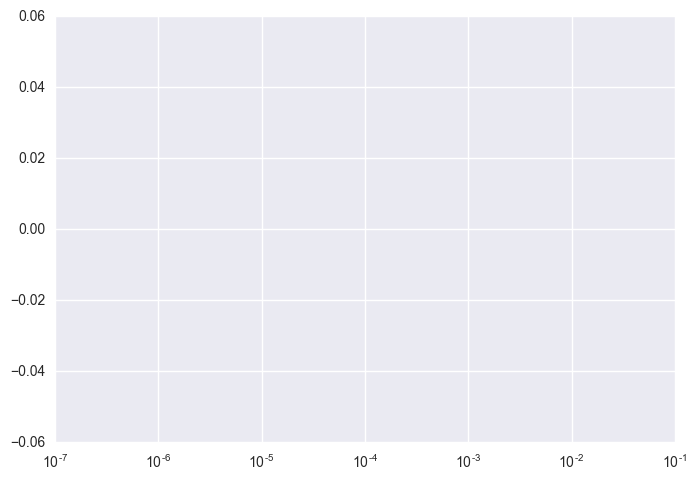

In [16]:
# Your code goes here

x = []
columns = 20
rows = 3
for j in range(columns):
     for i in range(rows):
        x.append(score_array[i][j])

y = np.array_split(x, 20)
arr_mean = []
for z in y:
    arr_mean.append(np.mean(z))
    
print(arr_mean)
print(np.max(arr_mean))
ax = plt.semilogx(x = arr_mean, y = C)

### ========== Question 1.14 ==========
Find and display the optimal value for the regularisation parameter `C` of the logistic classifier by using your results from Question 1.12. Similarly to Question 1.13, consider the mean classifiation accuracy across CV folds. By using the optimal value (i.e. the one that yields the highest average classification accuracy) train a new `LogisticRegression` classifier and report the classification accuracy on the validation set. *(Hint: Do not pick the optimal value "by hand", instead use an appropriate numpy function).*

In [20]:
# Your code goes here
m = max(arr_mean)
a = ([i for i, j in enumerate(arr_mean) if j == m])
print(a)
print("The optimal value in Score array is", a) #a is 1.0
#print(score_array)#1.0 is the second digit of the first fold
print("The optimal C parameter is:", C[15]) #so the second C parameter is the opitmal value
lr = LogisticRegression(solver='lbfgs', C = C[15])
lr.fit(X_val_trans, y_val)
print('Classification accuracy on validation set: {:.3f}'.format(lr.score(X_val_trans, y_val)))

[15]
The optimal value in Score array is [15]
The optimal C parameter is: 784.759970351
Classification accuracy on validation set: 0.812


### ========== Question 1.15 ========== 
Scikit-learn offers a [`LogisticRegressionCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) module which implements Logistic Regression with builtin cross-validation to find out the optimal `C` parameter. You can specify the range for the `C` parameter, as well as the cross-validation method you want to use with the `Cs` and `cv` parameters, respectively. Use the `C` range you set up in Question 1.12 and the 3-fold cross-validation iterator from Question 1.11. Once again, train the models by using the `lbfgs` optimisation method and display the optimal value for the parameter `C`. Finally, display the classification accuracy on the validation set. Can you verify that your results are consistent with those from Question 1.14?

In [21]:
# Your code goes here

C_param = np.logspace(start=-5, stop=5, num=20)
lrCV = LogisticRegressionCV(Cs= C_param, cv= kf, solver = 'lbfgs')
lrCV.fit(X_val_trans, y_val)
print(lrCV.C_)
print('Classification accuracy on validation set: {:.3f}'.format(lrCV.score(X_val_trans, y_val)))
#my results are different than 1.14. The best C value is 0.004.

[ 0.004]
Classification accuracy on validation set: 0.780


### ========== Question 1.16 ==========
Now, we want to validate the importance of various features for classification. For this purpose, we will use a [`RandomForestClassifier`](http://scikit-learn.org/0.17/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (you might want to refer to Lab_3 if you are unsure how we can estimate feature importances with decision tree and random forest models).

Initialise a random forest classifier and fit the model by using training data only and 500 trees (i.e. `n_estimators`). Set the `RandomState` equal to 31 to ensure reproducible results. Report the accuracy score on both the training and validation sets.

In [22]:
# Your code goes here
rf = RandomForestClassifier(n_estimators=500, random_state=31)
rf.fit(X_tr_trans, y_tr)
prediction_train = rf.predict(X=X_tr_trans)
print('Classification accuracy on training set: {:.3f}'.format(accuracy_score(y_tr,prediction_train)))
prediction_val = rf.predict(X=X_val_trans)
print('Classification accuracy on validation set: {:.3f}'.format(accuracy_score(y_val,prediction_val)))

Classification accuracy on training set: 1.000
Classification accuracy on validation set: 1.000


### ========== Question 1.17 ==========
Comment on the results above. Do you find the discrepancy between training and validation accuracies surprising?

The training and validation scores have the same accuracy of 1.0. This is suprising because I didn't think they should both have perfect accuracies. 



### ========== Question 1.18 ==========
By using the random forest model from the previous question order the features by descending importance and display the names of the 50 most important features.

In [23]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range((X_tr_trans.shape[1])):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 20 (0.008335)
2. feature 478 (0.006743)
3. feature 359 (0.006573)
4. feature 282 (0.006489)
5. feature 50 (0.006333)
6. feature 75 (0.006276)
7. feature 3 (0.005398)
8. feature 460 (0.005099)
9. feature 329 (0.005098)
10. feature 397 (0.005033)
11. feature 342 (0.004953)
12. feature 221 (0.004787)
13. feature 273 (0.004644)
14. feature 216 (0.004518)
15. feature 484 (0.004488)
16. feature 422 (0.004456)
17. feature 262 (0.004446)
18. feature 355 (0.004366)
19. feature 346 (0.004307)
20. feature 73 (0.004264)
21. feature 213 (0.004226)
22. feature 499 (0.004102)
23. feature 328 (0.004051)
24. feature 91 (0.004048)
25. feature 53 (0.004025)
26. feature 325 (0.004004)
27. feature 89 (0.003917)
28. feature 347 (0.003910)
29. feature 311 (0.003849)
30. feature 153 (0.003785)
31. feature 482 (0.003772)
32. feature 24 (0.003753)
33. feature 288 (0.003738)
34. feature 76 (0.003680)
35. feature 133 (0.003672)
36. feature 253 (0.003636)
37. feature 426 (0.003617)
38. 

### ========== Question 1.19 ==========
Next, we would like to test out the performance of support vector classification and experiment with different kernels. 
By using training data only and default parameter settings, train three support vector classifiers with the following kernels: linear, radial basis function, and polynomial. Report the classification accuracy of each of the three classifiers on both the training and validation sets.

In [24]:
# Your code goes here
sv1 = SVC(kernel='linear')
sv2 = SVC(kernel='rbf')
sv3 = SVC(kernel= 'poly')

sv1.fit(X_tr_trans, y_tr)
sv2.fit(X_tr_trans, y_tr)
sv3.fit(X_tr_trans, y_tr)

print(sv1.score(X_tr_trans, y_tr))
print(sv1.score(X_val_trans, y_val))
print(sv2.score(X_tr_trans, y_tr))
print(sv2.score(X_val_trans, y_val))
print(sv3.score(X_tr_trans, y_tr))
print(sv3.score(X_val_trans, y_val))

0.842331581462
0.842331581462
0.910654562828
0.910654562828
0.990922121357
0.990922121357


### ========== Question 1.20 ==========
At this point, we would like to get an idea of what kind of decision boundaries we can get with the three types of SVM kernels we introduced in the previous question. For visualisation, however, we can only make use of 2D input data. For this purpose, we select to use the 21st and 76th columns of our training features (*hint: remember that Python uses 0-based indexing*). 

Execute the cell below to define a useful function which we will be using to plot the decision boundaries *(it is also not a bad idea to try to understand what this functions does)*. 

Then train three distinct SVM classifiers by using the 2D input data mentioned above and default parameters:
* a linear SVC
* an RBF SVC 
* a polynomial SVC

Finally, create a list containing the three classifiers you have just trained. Use this list as an input to the provided function along with the used training features and observe the outcome. You can use the additional `title` parameter to set the titles in the subplots. Comment on the results by using 1-2 sentences.

*(Acknowledgement: this Question has been heavily based on [this example](http://scikit-learn.org/0.17/auto_examples/svm/plot_iris.html) from scikit-learn's documentation.)*

In [88]:
def show_svc_decision_boundaries(clfs, X, title=None):
    """Plots decision boundaries for classifiers with 2D inputs.
    
    Parameters
    ----------
    clf : list
        Classifiers for which decision boundaries will be displayed.
    X : array
        Input features used to train the classifiers.
    title : list, optional
        Titles for classifiers.
    
    """
    
    assert X.shape[1] == 2 # Input should be 2D
    if title is not None:
        assert len(clfs) == len(title)
    
    h = .04 # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    plt.figure(figsize=(15,5))
    for i, clf in enumerate(clfs):
        plt.subplot(1, len(clfs), i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        # Training points
        plt.scatter(X[:, 0], X[:, 1], c=y_tr, cmap=plt.cm.Paired)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        if title is not None:
            plt.title(title[i])

(2093, 2)


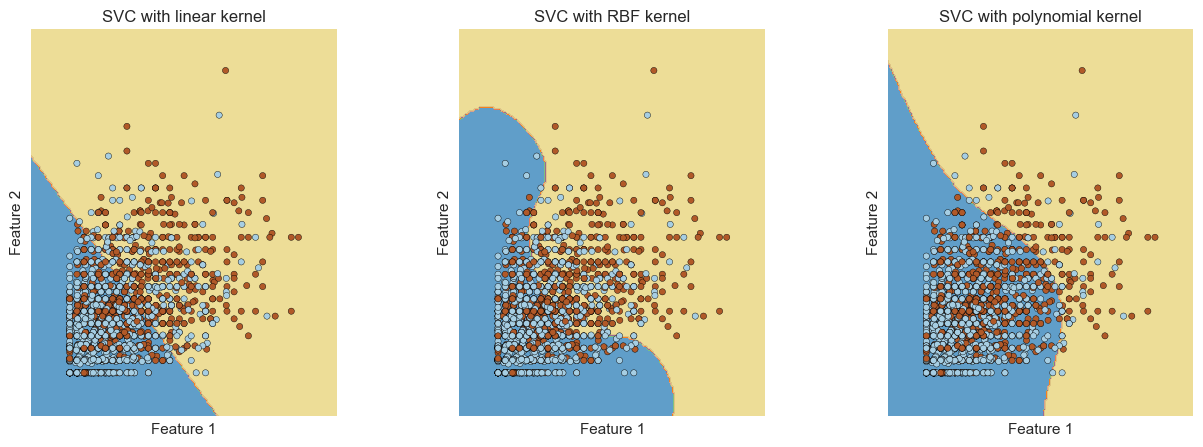

In [130]:
# Your code goes here

X_t = X_tr_trans[:,[20,75]]



print(np.shape(X_t))
sv4 = SVC(kernel='linear').fit(X_t, y_tr)
sv5 = SVC(kernel='rbf').fit(X_t, y_tr)
sv6 = SVC(kernel= 'poly').fit(X_t, y_tr)
svList = [sv4, sv5, sv6]

titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial kernel']

show_svc_decision_boundaries(svList, X_t, title=titles)

The polynomial kernel includes more data points than the others. The linear kernel and RBF have very similar outcomes. 



### ========== Question 1.21 ==========
So far we have used default parameters for training the SVM classifiers. Now we want to tune the parameters by using cross-validation. 

By using the `K-fold` iterator from Question 1.11 and training data only, estimate the classification accuracy of an SVM classifier with RBF kernel, while you vary the penalty parameter `C` in a logarithmic range `np.logspace(-2, 3, 10)`. Set the kernel coefficient parameter `gamma` to `auto` for this question. 

Plot the mean cross-validated classification accuracy against the regularisation parameter `C` by using a log-scale for the x-axis. Display the highest obtained mean accuracy score and the value of `C` which yielded it. Label axes appropriately. 

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

[[ 0.     1.     0.     1.     0.     0.     0.     0.     0.     1.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.946  0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.   ]]
[0.0, 0.33333333333333331, 0.0, 0.33333333333333331, 0.0, 0.0, 0.0, 0.31536926147704591, 0.0, 0.33333333333333331, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.333333333333


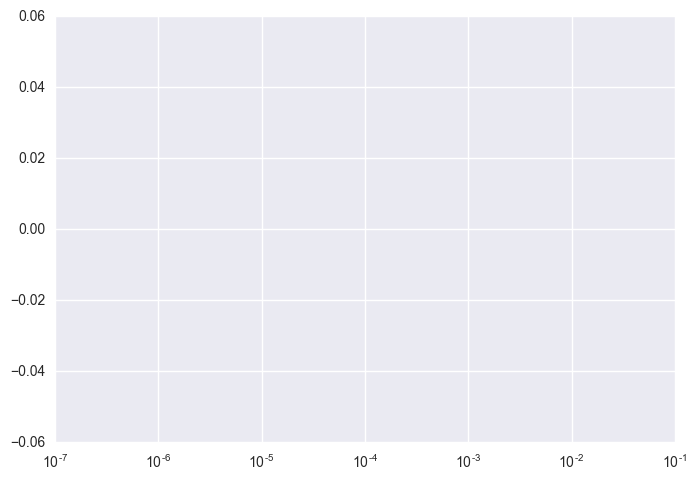

In [131]:
# Your code goes here
C = np.logspace(start=-2, stop=3, num=10)
kf = KFold(500, n_folds=3, shuffle=True, random_state=0)
score_array = np.empty((3, 20))

for train, test in kf:
    X_train, X_test = X_tr_trans[train], X_tr_trans[test]
    y_train, y_test = y_tr[train], y_tr[test]
    fold = 0
    for c in C:
        count = 1
        svR = SVC(C = c, kernel= 'rbf', gamma='auto').fit(X_tr_trans, y_tr)
        svR.fit(X_train, y_train)
        score_array[fold, count] = svR.score(X_train, y_train)
        count = count + 1
        
    fold = fold + 1
        
print(score_array)


x = []
columns = 20
rows = 3
for j in range(columns):
     for i in range(rows):
        x.append(score_array[i][j])

y = np.array_split(x, 20)
arr_mean = []
for z in y:
    arr_mean.append(np.mean(z))
    
print(arr_mean)
print(np.max(arr_mean))
ax = plt.semilogx(x = arr_mean, y = C)


In [114]:
m = max(arr_mean)
a = ([i for i, j in enumerate(arr_mean) if j == m])
print(a)
print("The optimal value in Score array is", a) #a is 1.0
#print(score_array)#1.0 is the second digit of the first fold
print("The optimal C parameter is:", C[1]) #so the second C parameter is the opitmal value
sv = SVC(C = C[1], kernel= 'rbf', gamma='auto').fit(X_tr_trans, y_tr)
print('Classification accuracy on training set: {:.3f}'.format(sv.score(X_tr_trans, y_tr)))
print('Classification accuracy on validation set: {:.3f}'.format(sv.score(X_val_trans, y_val)))

[1]
The optimal value in Score array is [1]
The optimal C parameter is: 0.035938136638
Classification accuracy on training set: 0.636
Classification accuracy on validation set: 0.636


### ========== Question 1.22 ==========
Now we turn to the kernel coefficient `gamma` parameter. By using the same procedure as in the previous question, estimate the classification accuracy of an SVM classifier with RBF kernel while you vary the `gamma` parameter in a logarithmic range `logspace(-5, 0, 10)`. Fix the penalty parameter `C=1.0`.

Plot the mean cross-validated classification accuracy against the parameter `gamma` by using a log-scale for the x-axis. Display the highest obtained mean accuracy score and the value of `gamma` which yielded it.  Label axes appropriately.

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

[[  0.000e+000   1.000e+000   0.000e+000   1.000e+000   2.202e-314
    0.000e+000   0.000e+000   0.000e+000   0.000e+000   9.461e-001
    0.000e+000   0.000e+000   0.000e+000   0.000e+000   1.750e-060
    0.000e+000   0.000e+000   2.134e-314   0.000e+000   2.202e-314]
 [  0.000e+000   0.000e+000   1.749e-060   0.000e+000   0.000e+000
    0.000e+000   0.000e+000   1.000e+000   0.000e+000   0.000e+000
    0.000e+000   2.134e-314   0.000e+000   0.000e+000   0.000e+000
    0.000e+000  -9.245e+255   0.000e+000   0.000e+000   0.000e+000]
 [  0.000e+000   2.202e-314   0.000e+000   0.000e+000   0.000e+000
    0.000e+000   2.134e-314   0.000e+000   0.000e+000   2.202e-314
    0.000e+000   1.992e-060   0.000e+000   0.000e+000   2.372e-322
    0.000e+000   0.000e+000   0.000e+000   0.000e+000   0.000e+000]]
[0.0, 0.33333333333333331, 5.8287667619416298e-61, 0.33333333333333331, 7.3400162435164942e-315, 0.0, 7.1147969178660643e-315, 0.33333333333333331, 0.0, 0.31536926147704591, 0.0, 6.63938075761

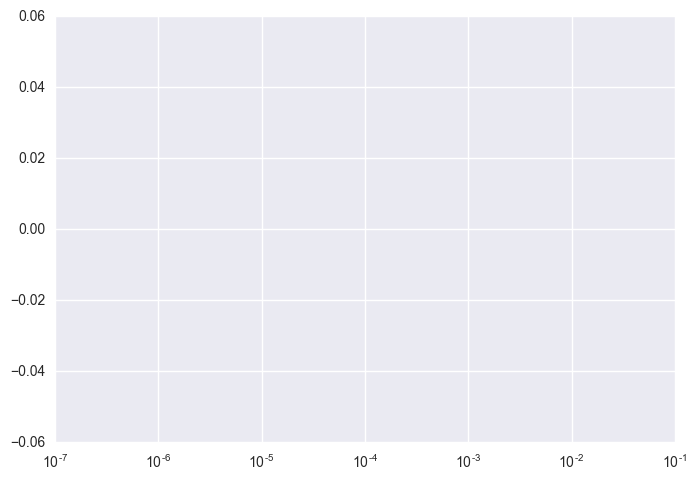

In [121]:
# Your code goes here
G = np.logspace(start=-5, stop=0, num=10)
kf = KFold(500, n_folds=3, shuffle=True, random_state=0)
score_array = np.empty((3, 20))

for train, test in kf:
    X_train, X_test = X_tr_trans[train], X_tr_trans[test]
    y_train, y_test = y_tr[train], y_tr[test]
    fold = 0
    for g in G:
        count = 1
        svG = SVC(C = 1.0, kernel= 'rbf', gamma=g).fit(X_tr_trans, y_tr)
        svG.fit(X_train, y_train)
        score_array[fold, count] = svG.score(X_train, y_train)
        count = count + 1
        
    fold = fold + 1
        
print(score_array)

x = []
columns = 20
rows = 3
for j in range(columns):
     for i in range(rows):
        x.append(score_array[i][j])

y = np.array_split(x, 20)
arr_mean = []
for z in y:
    arr_mean.append(np.mean(z))
    
print(arr_mean)
print(np.max(arr_mean))
ax = plt.semilogx(x = arr_mean, y = C)

m = max(arr_mean)
a = ([i for i, j in enumerate(arr_mean) if j == m])
print(a)
print("The optimal value in Score array is", a)
print("The optimal C parameter is:", C[1]) #so the second C parameter is the opitmal value
svC = SVC(C = C[1], kernel= 'rbf', gamma='auto').fit(X_tr_trans, y_tr)
print('Classification accuracy on training set: {:.3f}'.format(svC.score(X_tr_trans, y_tr)))
print('Classification accuracy on validation set: {:.3f}'.format(svC.score(X_val_trans, y_val)))

### ========== Question 1.23 ==========
Now we wish to tune both the `C` and `gamma` parameters simultaneously. To save computational time, we will now constrain the parameter search space. Define a `4 X 4` grid for the two parameters, as follows:
* `C`: `np.logspace(-2, 1, 4)`
* `gamma`: `np.logspace(-4, -1, 4)`

Estimate the mean cross-validated classification accuracy by using training data only and all possible configurations for the two parameters. 

Use a [heatmap](https://seaborn.github.io/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap) to visualise the mean cross-validated classification accuracy for all `C`-`gamma` pairs. Label axes appropriately and display the values for `C` and `gamma` for the best performing configuration. 

Finally, by using the optimal configuration, train a classifier (without using cross-validation) and report the classification accuracy on the training and validation sets.

In [208]:
m1 = np.logspace(-2, 1, 4)
m2 = np.logspace(-4, -1, 4)

print(m3)
print(m1)
print(m2)
z = [4*[0] for i in range(2)]
columns = 4
rows = 2
for j in range(columns):
     for i in range(rows):
        z[i][j]= m1[i][j]+m2[i][j]

[[0, 0, 0, 0], [0, 0, 0, 0]]
[  0.01   0.1    1.    10.  ]
[ 0.     0.001  0.01   0.1  ]


IndexError: invalid index to scalar variable.

### ========== Question 1.24 ==========
Is the classification accuracy on the validation set higher than in previous questions (1.22-1.23)? If not, can you explain why? Can you think of a way of further improving the performance of the classifier? You don't need to implement your suggestion at this stage. Would there be any associated problems with your suggested approach? 

*Your answer goes here*



### ========== Question 1.25 ==========
Now we want to evaluate the performance of an SVM classifier with polynomial kernel. Once again, we will tune the `degree` parameter by using cross-validation (similarly to what we did in Questions 1.21 and 1.22).

By using the `K-fold` iterator from Question 1.11 and training data only, estimate the classification accuracy of polynomial SVM classifier, while you vary the `degree` parameter in the range `np.arange(1,8)`. 

Plot the mean cross-validated classification accuracy against the polynomial degree. Display the highest obtained mean accuracy score and the value of the `degree` parameter which yielded it. Label axes appropriately. 

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

In [ ]:
# Your code goes here


### ========== Question 1.26 ==========

You might have noticted that so far, we have used cross-validation for optimising the various tuning parameters (e.g. regularisation parameter in logistic regression, SVM kernel parameters) rather than hold-out validation, although we did have access to a validation set. Why do you think this is a good/bad idea? Give one advantage and one disadvantage of the two different approaches. Which one would you trust more in practice?

I think it is a good idea to use SVM over hold out because SVM avoids overfitting and can build your own kernel with specific parameters. However, it depends on what model you select and is sensitive to parameters given.
Hold out has a lot of variance meaning it depends on what values end up in which set. 
I would trust the SVM more than Hold Out.



### ========== Question 1.27 ==========

Reload the full training and validation data that contain all indicator variables for all object categories. Remove the `imgId` attribute but keep all of the class indicator variables in the dataset this time. Your training features should include all attributes except `is_person` which should be your target variable. 

Once again, use a [StandardScaler](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.StandardScaler.html) to standardise your training and validation features. Then train a Random Forest Classifier by using the entropy `criterion`, 500 `n_estimators`, and also set the `random_state` to 31. Report the classification accuracy on the training and validation sets.

Similarly to what we did in Question 1.18, order the features by decreasing importance and display the 50 most important features. 

Finally, answer the following questions:
* What do you notice by looking at the list of the best 50 features?
* How does the performance differ with respect to the case when the additional class indicator variables are not present (Question 1.16)? Relate your observations to the observed feature ranking.
* Would it be easy to make use of the results in practice? Briey explain your reasoning.

*(Hint: you might want to look at some of the [images](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) to justify your explanations.)*

In [51]:
# Your code goes here


*Your answer goes here*



## Mini challenge [30%]

*Important: You are allowed to write up to a maximum of 600 words in this part of the assignment. The thoroughness of the exploration and the quality of the resulting discussion is just as important as the final classification performance of your chosen method(s) and credit will be divided accordingly.*

In this final part of the assignment we will have a mini object-recognition challenge. Using the data provided you are asked to find the best classiffier for the person/no person classification task. You can apply any preprocessing steps to the data that you think fit and employ any classiffier you like (with the provison that you can explain what the classiffier/preprocessing steps are doing). You can also employ any lessons learnt during the course, either from previous Assignments, the Labs or the lecture material to try and squeeze out as much performance as you possibly can. The only restriction is that all steps must be performed in `Python` by using the `numpy`, `pandas` and `sklearn` packages. You can also make use of `matplotlib` and `seaborn` for visualisation. 

**Important:** The classification performance metric that we will use for this part is the *cross-entropy* or *logarithmic loss* (see Lab 4). You should familiarise yourself with the metric by reading the `sklearn` [user guide](http://scikit-learn.org/0.17/modules/model_evaluation.html#log-loss) and [documentation](http://scikit-learn.org/0.17/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss). To estimate this metric you will need to evaluate probability outputs, as opposed to discrete predictions which we have used so far to compute classification accuracies. Most models in `sklearn` implement a `predict_proba()` method which returns the posterior probabilities for each class. For instance, if your test set consists of `N` datapoints and there are `K` classes, the method will return a `N` x `K` matrix.

We provide you with three new data sets: a training set (`train_images_partB.csv`), a validation set (`valid_images_partB.csv`), and a test set (`test_images_partB.csv`). You must use the former two for training and evaluating your models (as you see fit). Once you have chosen your favourite model (and pre-processing steps) you should apply it to the test set (for which no labels are provided). Estimate the posterior proabilities for the data points in the test set and submit your results as part of your answer. Your results will be evaluated in terms of the logarithmic loss metric. You also need to submit a brief description of the approaches you considered, your suggested final approach, and a short explanation of why you chose it. The thoroughness of the exploration and the quality of the resulting discussion is just as important as the final score of your chosen method(s) and credit will be divided accordingly.

*Hint: Feature engineering, feature combination, model combination and model parameter optimization can significantly improve performance.*

**How to submit your results**: Store the estimated posterior probabilities for the data points in the test set into a 2D numpy array. Then execute the provided cell at the end of this notebook which uses a provided `save_predictions` function to export your results into a `.txt` file (the function will return an error if the provided array has not the right shape). The `.txt` file will be saved where your notebook lives. You are then required to copy this file into your submission folder along with your notebook (see Mecanics section at the top of the notebook) and then submit the two files by using the `submit` command on DICE. You are only required to use the `submit` command once.

*Your answer goes here (max. 600 words)*



In [180]:
data_path_t = os.path.join(os.getcwd(), 'datasets', 'train_images_partB.csv')
train_B = pd.read_csv(data_path_t, delimiter = ',')
data_path_v = os.path.join(os.getcwd(), 'datasets', 'valid_images_partB.csv')
valid_B = pd.read_csv(data_path_v, delimiter = ',')
data_path_test = os.path.join(os.getcwd(), 'datasets', 'test_images_partB.csv')
test_B = pd.read_csv(data_path_test, delimiter = ',')

print('Number of instances of train_B: {}, number of attributes: {}'.format(train_B.shape[0], train_B.shape[1]))
print('Number of instances of valid_B: {}, number of attributes: {}'.format(valid_B.shape[0], valid_B.shape[1]))
print('Number of instances of test_B: {}, number of attributes: {}'.format(test_B.shape[0], test_B.shape[1]))
names_B = list(train_B.columns[1:501])
X_tr_B, X_val_B, y_tr_B, y_val_B = train_B[names_B], valid_B[names_B], train_B["is_person"], valid_B["is_person"]
print(X_tr_B.shape)
print(X_val_B.shape)
print(y_tr_B.shape)
print(y_val_B.shape)



Number of instances of train_B: 2113, number of attributes: 520
Number of instances of valid_B: 1113, number of attributes: 520
Number of instances of test_B: 1114, number of attributes: 501
(2113, 500)
(1113, 500)
(2113,)
(1113,)


In [181]:
lr_B = LogisticRegression(solver='lbfgs')
lr_B.fit(X_tr_B, y_tr_B)
lr_B.fit(X_val_B, y_val_B)
print('Classification accuracy on training set: {:.3f}'.format(lr.score(X_tr_B, y_tr_B)))
print('Classification accuracy on validation set: {:.3f}'.format(lr.score(X_val_B, y_val_B)))

Classification accuracy on training set: 0.549
Classification accuracy on validation set: 0.527


In [182]:
scaler = preprocessing.StandardScaler().fit(X_tr_B)
X_tr_trans_B = (scaler.transform(X_tr_B))
X_val_trans_B = (scaler.transform(X_val_B))

print("Training set mean:")
print(X_tr_trans_B[0:5].mean(axis=1))
print("Training set standard deviation")
print(X_tr_trans_B[0:5].std(axis=1))

print("Validation set mean:")
print(X_val_trans_B[0:5].mean(axis=1))
print("Validation set standard deviation")
print(X_val_trans_B[0:5].std(axis=1))

lr_tr = LogisticRegression(solver='lbfgs')
lr_tr.fit(X_tr_trans_B, y_tr_B)
lr_tr.fit(X_val_trans_B, y_val_B)
print('Classification accuracy on training set: {:.3f}'.format(lr_tr.score(X_tr_trans_B, y_tr_B)))
print('Classification accuracy on validation set: {:.3f}'.format(lr_tr.score(X_val_trans_B, y_val_B)))


Training set mean:
[-0.085 -0.085 -0.085 -0.085 -0.085]
Training set standard deviation
[ 0.004  0.005  0.005  0.005  0.005]
Validation set mean:
[-0.085 -0.085 -0.085 -0.085 -0.085]
Validation set standard deviation
[ 0.004  0.005  0.005  0.005  0.005]
Classification accuracy on training set: 0.633
Classification accuracy on validation set: 0.649


In [194]:
names_B_test = list(test_B.columns[0:500])

X_test_B = test_B[names_B_test]
y_test_B = test_B["is_person"]

y_pred = lr_tr.predict_proba(X_test_B)

y_pred_B = y_pred[0:1113]
print(y_pred.shape)

(1114, 2)


In [187]:
from sklearn.metrics import log_loss
logLoss = log_loss(y_val_B, y_pred_B)
print(logLoss)


0.691960020293


In [195]:
y_pred.shape

(1114, 2)

In [196]:
# Execute this cell to export your results
from numpy import savetxt
def save_predictions(pred_proba):
    if pred_proba.shape != (1114,2):
        raise ValueError('Predicted probabilities array has not the right shape.')
    
    savetxt('assignment_3_predictions.txt', pred_proba)

save_predictions(y_pred) # You need to replace "pred_proba" with the name of the array
                             # which contains the probability estimates for the data in 
                             # the test set.

For this Mini Challenge, I trained the training and validation data using Logistic Regression. I used this classifier because it gave me the best results earlier in the lab. However, after training the data, I received an accuracy of 0.549 and 0.527. This is not a very good accuracy. So I transformed the data using StandardScaler(). After I scaled and transformed the data, the accuracy improved to 0.633 and 0.649.
I then used this classifier to predict the testing data. After predicting the data, I got a log_loss of 0.692. 
After using this classifier and seeing the results, I would probably not use it again in this context. It did not give me the best results. I would use something like a SVC by varying the C value. 


